In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns

In [2]:
car=pd.read_csv("/content/Cars.csv")

In [3]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
car.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [6]:
car.isna().sum()   # if any MISSING values

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
car.corr()   # to find correlations in variables 

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [8]:
# above we got correlation of SP & HP,  WT & VOL

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30f9312410>,
      dtype=object)

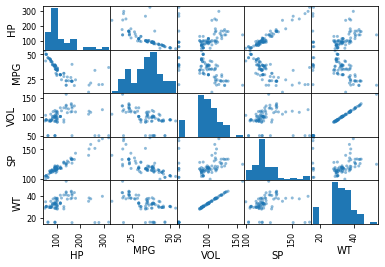

In [9]:
pd.plotting.scatter_matrix(car)   #scatter plot to see correlation

the plots shows relation of every variable with each other. we have to find relation of MPG with other variables.
MPG & HP = -ve relation.
MPG & VOL= -ve relation.
MPG & SP= -ve relation.
MPG & WT= -ve relation.

but we can see there is linear relation between -
WT AND VOL 
SP AND HP


In [10]:
import statsmodels.formula.api as smf # to built a model

In [11]:
model=smf.ols("MPG~WT+VOL+SP+HP",data=car).fit()    #same as linear regression 

here we have given MPG is "y" and rest all the variables are "x"

In [12]:
model.params  # to get intercept and slopes

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [13]:
# to see if the model is good or not find pvalues and tvalues

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


for multi linear regreesion

if variable is important we will get-
h0=no slope
h1= slope 
pvalue by default always=0.05


WT=0.8>0.05,

VOL=0.55>0.05,

SP=0.014<0.05,

HP=0.000001<0.05,

Here we get VOL & WT are not imp but
SP & HP are important

In [15]:
# test if linear regression correct or not

# Simple Regression Model 

In [16]:
model_v=smf.ols("MPG~VOL",data=car).fit()
# get pvalue and tvalue
print(model_v.pvalues, '\n', model_v.tvalues)

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64 
 Intercept    14.106056
VOL          -5.541400
dtype: float64


In [17]:
# here we got pvalue 3.82-07 means 0 to power of 7 times. i.e 0 
# 0 is important

In [18]:
model_w=smf.ols("MPG~WT",data=car).fit()
print(model_w.pvalues, '\n', model_w.tvalues)

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64 
 Intercept    14.248923
WT           -5.508067
dtype: float64


In [19]:
# same as above 4.38-07 i.e 0

when we used simple linear regression vol and wt are important but im multi regression it was not important.

In [20]:
# to find correlation 
car.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Assumptions of Multi Linaer Regression

1."x" should have corelation with "y"

2.there should not have correlation of "x" to "x"

In [21]:
# here we have multi colinearity of WT & VOL and SP & HP
# this Can create problem in multi linear regression
# variance inflation factor (VIF)to find if the variance has corelationship or not if there is impact of colinearity we use VIF 

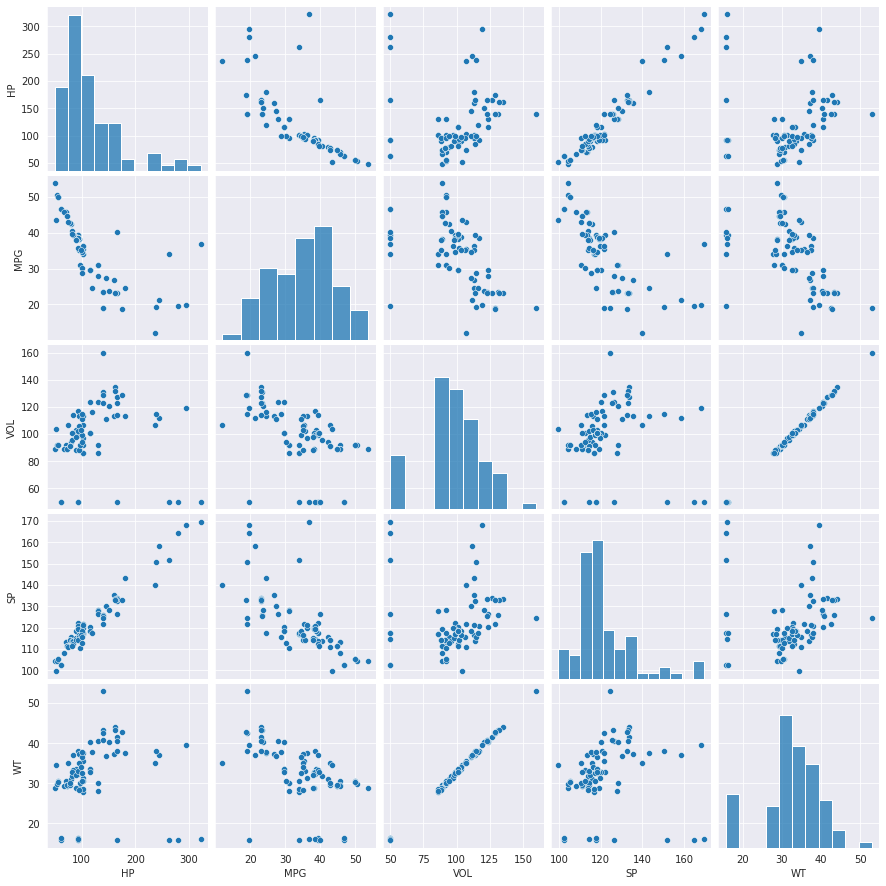

In [22]:
sns.set_style(style="darkgrid")
sns.pairplot(car)

# VIF
VIF = 1/1-R^2

In [23]:
rsqu_hp=smf.ols("HP~WT+SP+VOL",data=car).fit().rsquared
vif_hp=1/(1-rsqu_hp)

rsqu_wt=smf.ols("WT~HP+SP+VOL",data=car).fit().rsquared
vif_wt=1/(1-rsqu_wt)

rsqu_sp=smf.ols("SP~WT+HP+VOL",data=car).fit().rsquared
vif_sp=1/(1-rsqu_sp)

rsqu_vol=smf.ols("VOL~SP+HP+WT",data=car).fit().rsquared
vif_vol=1/(1-rsqu_vol)

d1={"variable": ['HP','SP','WT','VOL'],"VIF": [vif_hp,vif_sp,vif_wt,vif_vol]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,variable,VIF
0,HP,19.926589
1,SP,20.007639
2,WT,639.533818
3,VOL,638.806084


In [24]:
#vif>20    then the variable is involved in colinearity,vise varsa
#here hp and sp are involved,vol and wt has very high vif so not important 
# instead of removing wt and vol we create subset involving not important variable

# subset selection

In [25]:
# for subset selection we will use aic info criteria, 
# to create subset we use rsqu(high)and aic(less)

In [26]:
# model with wt
model=smf.ols('MPG~WT+SP+HP',data=car).fit()
f'AIC:{model.aic}, rsqu_wt:{rsqu_wt}'

'AIC:476.29927501529767, rsqu_wt:0.9984363610296332'

In [27]:
# model with vol
model=smf.ols('MPG~VOL+SP+HP',data=car).fit()
f'AIC:{model.aic},rsqu_wt:{rsqu_vol}'

'AIC:475.9875158854609,rsqu_wt:0.9984345797174133'

In [28]:
# here subset with wt is better but rsqu is almost same as simple linear regression and multi regression is sensitive to outliers
# to remove outliers that is errors

# Residual Analysis
removing errors 
e=(y-y^)

In [29]:
# test for normality of residual(q-q plot)

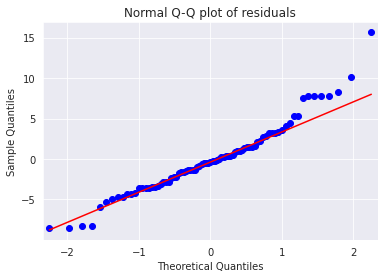

In [30]:
import statsmodels.api as sm

model=smf.ols('MPG~VOL+SP+HP',data=car).fit()
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
# we get that errors are distributed normally with vol

# Residual plot for Homoscedasticity

In [32]:
model=smf.ols('MPG~WT+HP+SP+VOL',data=car).fit()

In [33]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()  #formula for z-scores

In [34]:
# we use zscore bcoz we create plot using standardize values if we create plot with errors it will have very high values so it will not plot properly 
# so using z score we will get proper representation

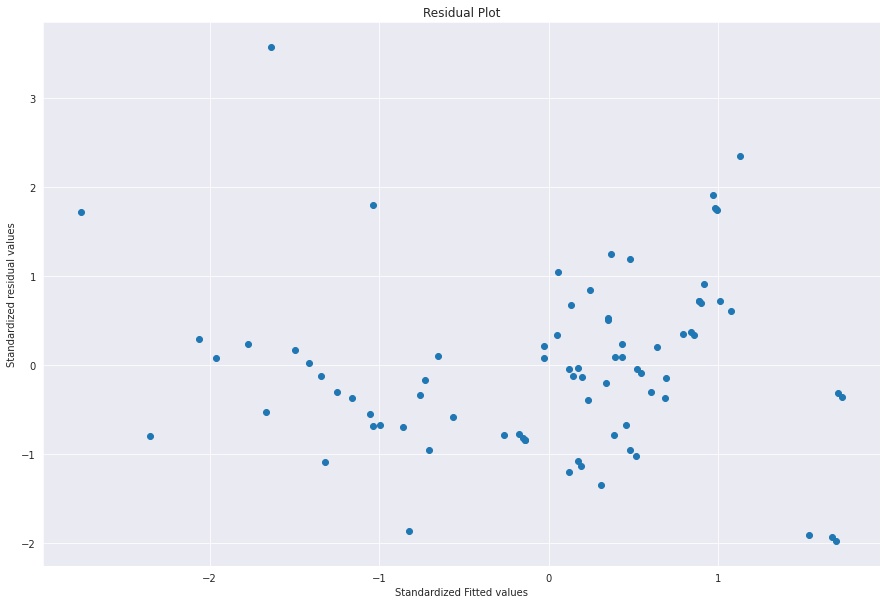

In [35]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [36]:
# here we have got erros(patterns like cluster pattern and U shaped pattern)

# Residual vs Regressor
that is error vs x

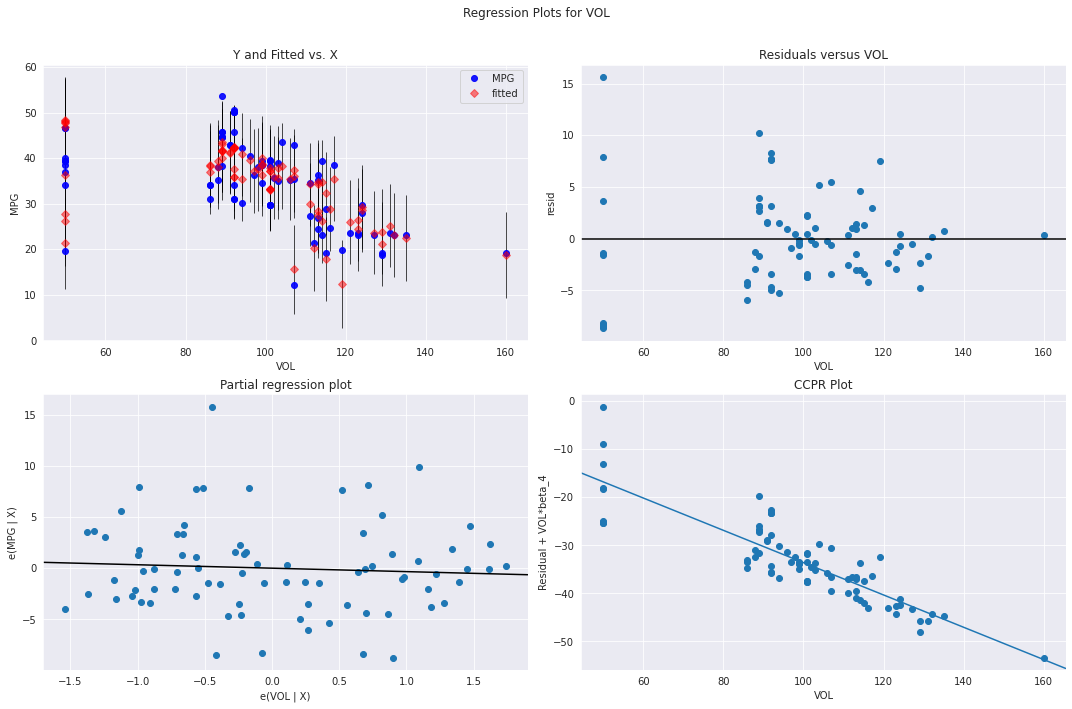

In [37]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

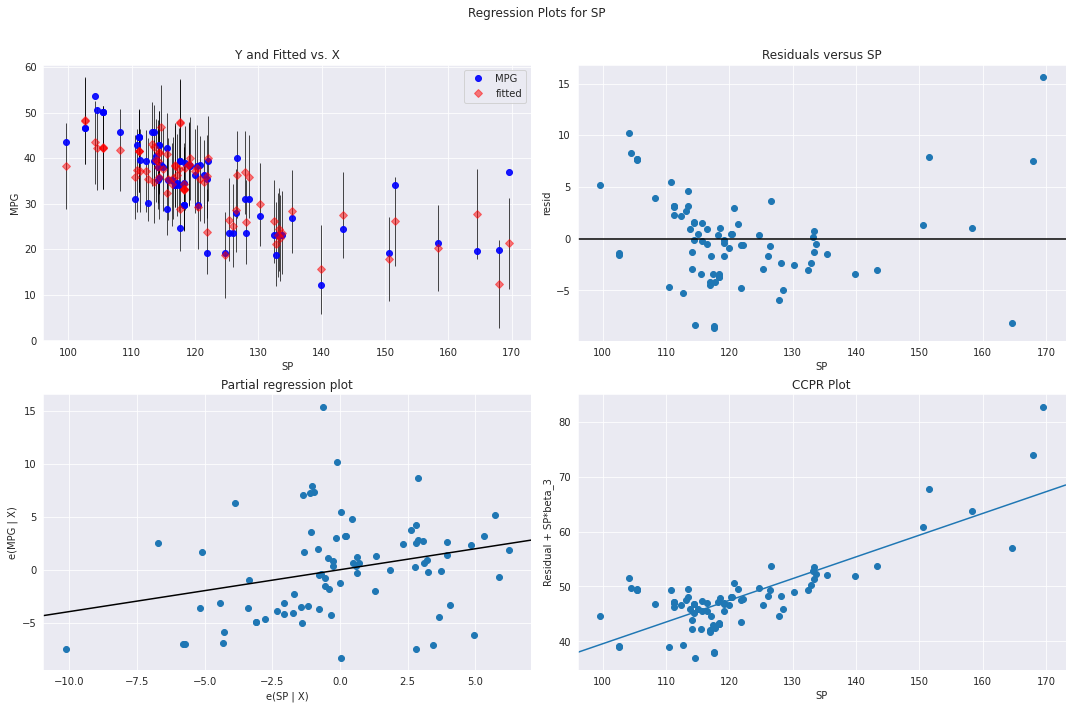

In [38]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

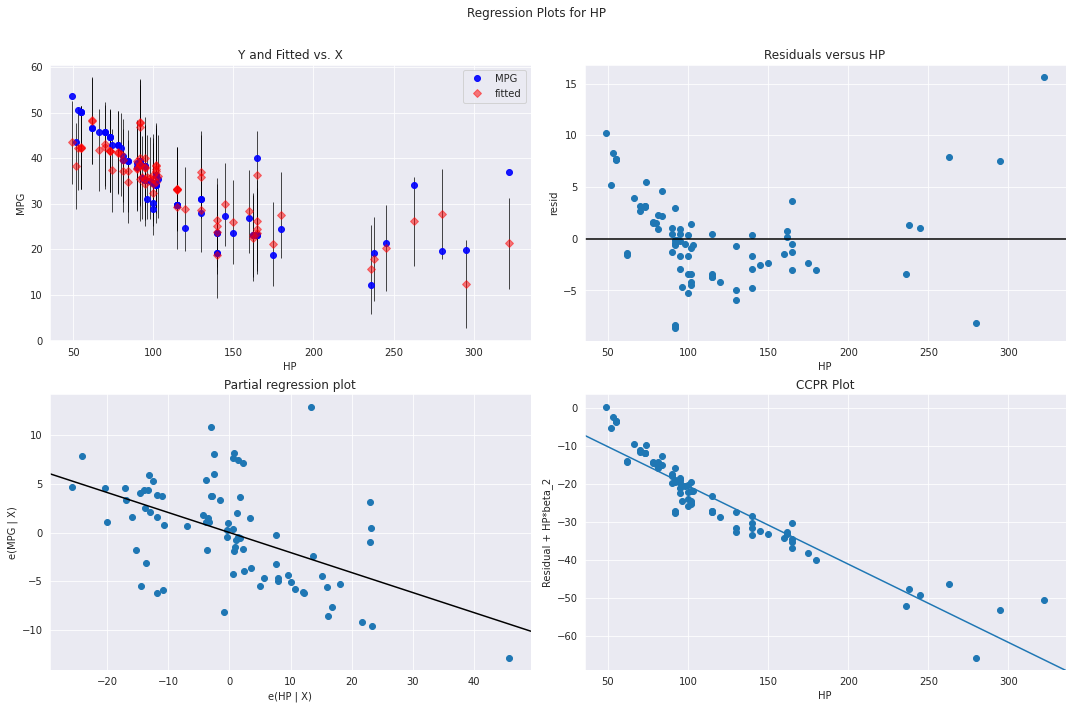

In [39]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

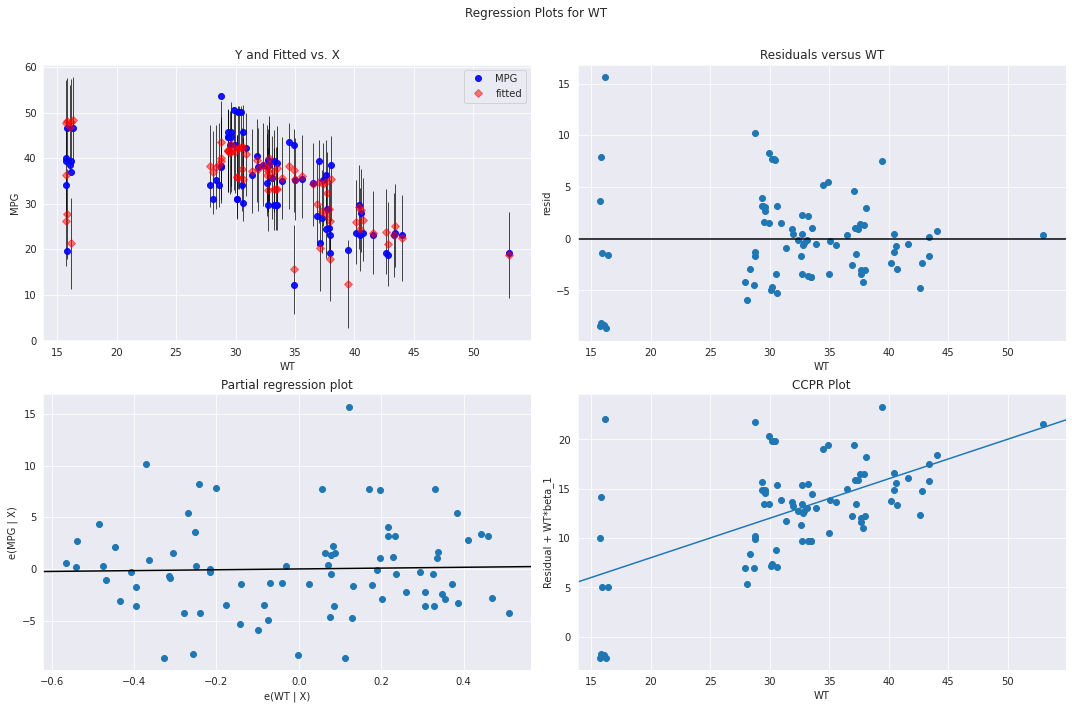

In [40]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

# Model deletion diagnostic 
detection influance or outliers

# Cook's Distance 
used to detect outliers or influancers

In [41]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence= model.get_influence()
(c,_)=model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


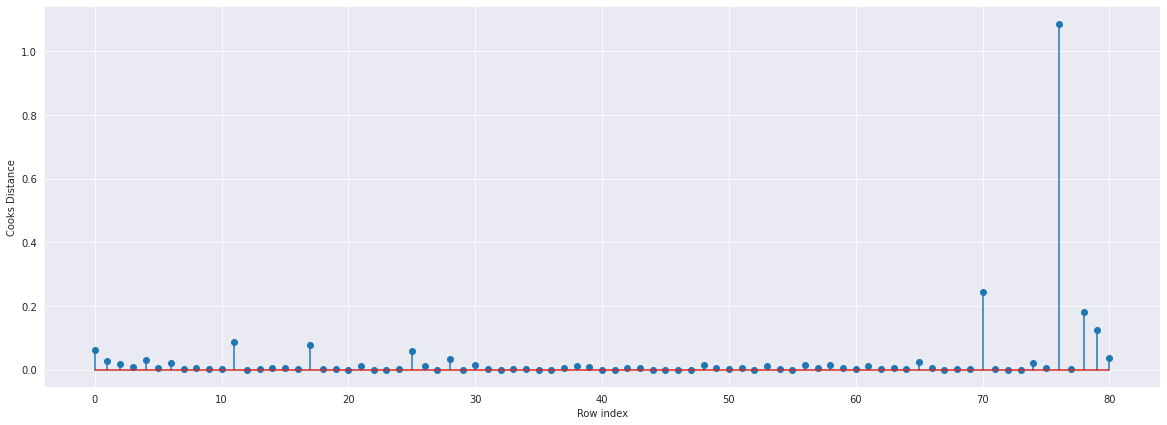

In [45]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()   # plot the influences value using syem plot

In [46]:
 (np.argmax(c),np.max(c))   #the index and value of influence where c is more than 0.5

(76, 1.0865193998180025)

# High Influence points

In [47]:
car.shape

(81, 5)

In [48]:
k=car.shape[1]
n=car.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.2222222222222222

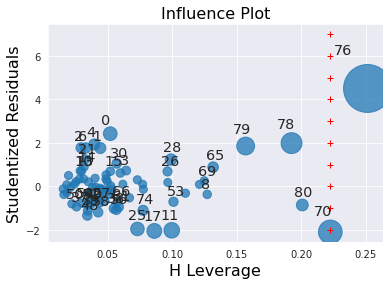

In [49]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

here the plot it is evident that data point 70 & 76 are influencers or outliers

In [51]:
car[car.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [52]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Imporving the model

In [60]:
car_n=pd.read_csv('/content/Cars.csv')

In [62]:
car_n1=car_n.drop(car_n.index[[70,76]],axis=0).reset_index()

In [63]:
car_n1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [64]:
car_n1=car_n1.drop(['index'],axis=1)

In [65]:
car_n1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Built a model

In [66]:
final_ml_V=smf.ols('MPG~VOL+SP+HP',data=car).fit()
#exclude variable "WT" & generate R-squared & AIC values

In [68]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.770368341321302, 475.9875158854609, 485.56531250415065)

In [70]:
final_ml_W=smf.ols('MPG~WT+SP+HP',data=car).fit()
#exclude variable "VOL" & generate R-squared & AIC values

In [71]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.7694828139983458, 476.29927501529767, 485.87707163398744)

by above result comparing R-square and AIC values, the model with VOL has high R-squared and low AIC value, so when we involve VOL the multi collinearity prb maybe solved

# Cooks Distance

In [72]:
model_influence_V=final_ml_V.get_influence()
(c_V,_)=model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


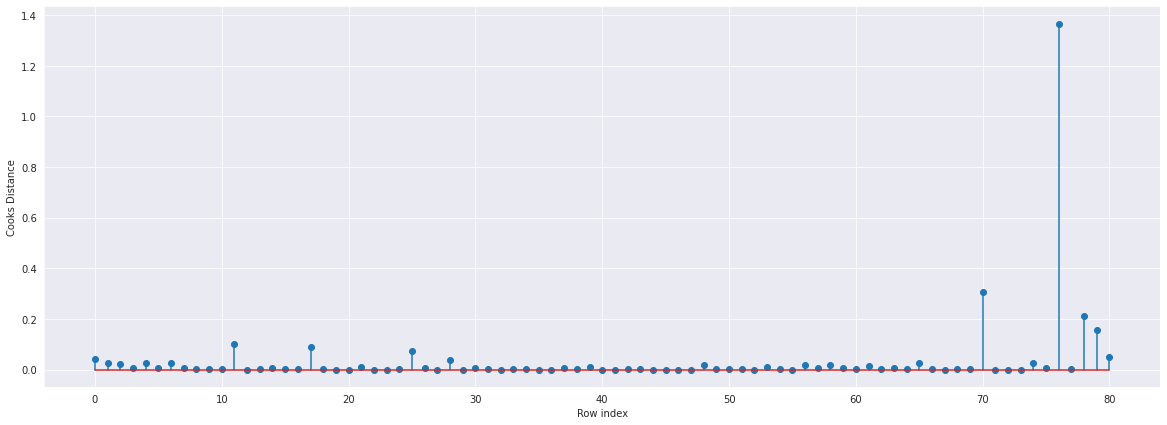

In [73]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car_n1)+2),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show()  

In [75]:
(np.argmax(c_V),np.max(c_V))
# index of data points where c is more than 0.5

(76, 1.3664551371566096)

In [76]:
car2=car_n1.drop(car_n1.index[[76,77]],axis=0)
# drop 76,77 observations

In [77]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [78]:
car3=car2.reset_index()
# reset the index and rearrange the row value

In [80]:
car4=car3.drop(['index'],axis=1)

In [81]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [89]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()
# build the model on new data

In [90]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance
# again check for influencers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


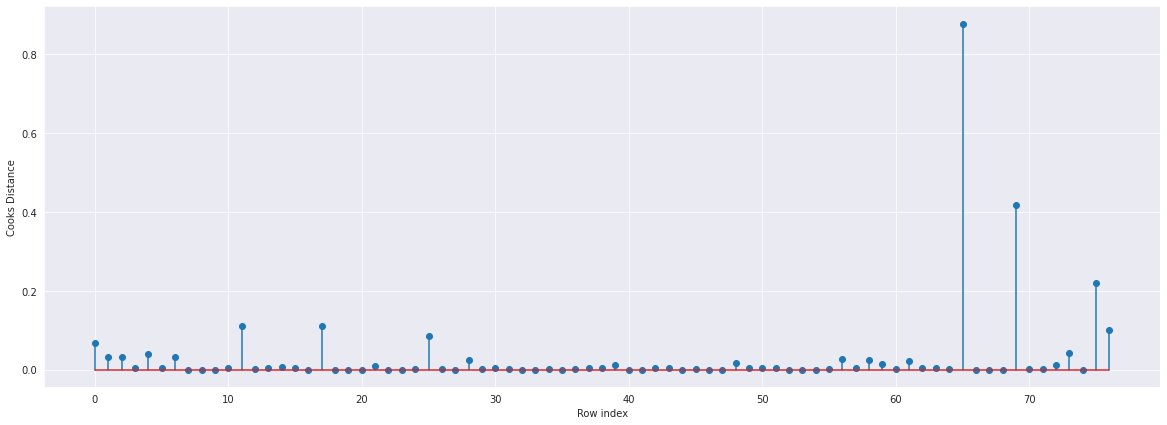

In [91]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

every point is <1

In [93]:
(np.argmax(c_V),np.max(c_V))
#index of the data points where c is more than .5

(65, 0.8774556986296681)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [94]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()
#Check the accuracy of the mode

In [95]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.866963611185906, 409.41530627195095)

# Predicting for new data

In [96]:
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])
#New data for prediction

In [97]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [100]:
final_ml_V.predict(car_n.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [101]:
pred_y = final_ml_V.predict(car_n)

In [102]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64